In [1]:
import os
import sys
home_dir = "../../"
module_path = os.path.abspath(os.path.join(home_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt

import numpy as np
%matplotlib inline 

from models.aa_common.data_loader import get_population_freq_SNVs

In [2]:
variants_df = get_population_freq_SNVs(home_dir=home_dir)
variants_df


Log: Loading data ...
(95223, 13)
Index(['snp_id', 'chrom_acc_version', 'chrom_pos', 'ref_allele', 'alt_allele',
       'prot_acc_version', 'prot_pos', 'wt', 'mut', 'wt_population',
       'mut_poulation', 'wt_freq', 'mt_freq'],
      dtype='object')
After combining common (18279), rare (29383) and sampled-singletons (48434), data: (95223, 13)
NP_001277137.1    95
NP_001291317.1    78
NP_002115.2       74
NP_112241.2       68
NP_001075106.2    65
                  ..
NP_037408.2        1
NP_066951.1        1
NP_001013716.2     1
NP_001316544.1     1
NP_065171.2        1
Name: prot_acc_version, Length: 14997, dtype: int64


,snp_id,chrom_acc_version,chrom_pos,ref_allele,alt_allele,prot_acc_version,prot_pos,wt,mut,wt_population,mut_poulation,wt_freq,mt_freq
0,rs41288789,NC_000002.12,26944749,G,A,NP_064519.2,512,A,T,218102,10302,0.954896,0.045104
1,rs34603401,NC_000001.11,9245386,A,C,NP_004276.2,151,D,A,225918,32086,0.875638,0.124362
2,rs115026899,NC_000001.11,210683774,C,A,NP_758872.1,826,G,V,211392,6706,0.969252,0.030748
3,rs17260829,NC_000006.12,122451974,T,C,NP_065806.1,225,S,G,301772,13333,0.957687,0.042313
4,rs1438318937,NC_000019.10,54575019,A,G,NP_001124389.2,214,E,G,11862,5489,0.683649,0.316351
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95218,rs1404095987,NC_000007.14,143755938,T,C,NP_848656.2,574,N,S,11862,1,0.999916,0.000084
95219,rs1331626452,NC_000019.10,57328412,G,C,NP_998763.2,317,G,A,4470,1,0.999776,0.000224
95220,rs751861106,NC_000020.11,44921715,G,A,NP_001359108.1,287,R,Q,35412,1,0.999972,0.000028
95221,rs771902243,NC_000008.11,28503161,C,T,NP_059108.1,50,L,M,35424,1,0.999972,0.000028


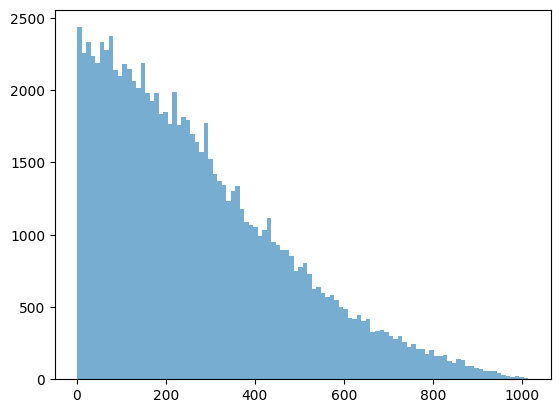

In [7]:
plt.hist(variants_df["prot_pos"], bins=100, log=False, density=False, alpha=.6)
plt.show()

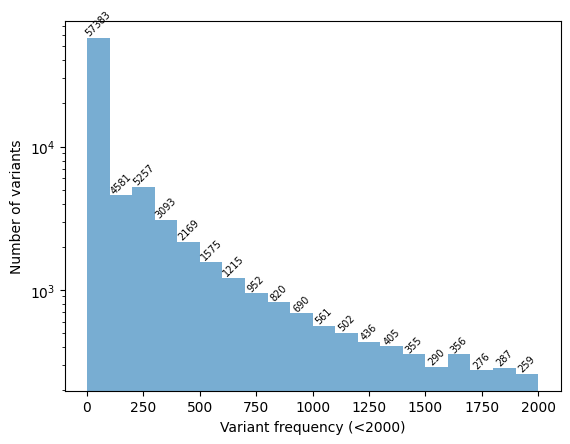

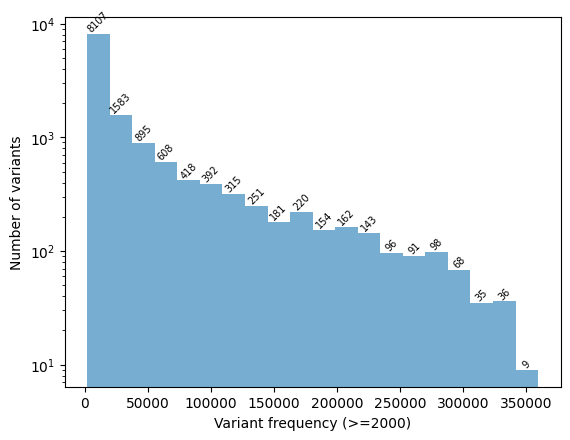

In [8]:
data = variants_df[variants_df["mut_poulation"] < 2000]["mut_poulation"]
counts, bins, patches = plt.hist(data, bins=20, log=True, alpha=.6,)
plt.bar_label(patches, fontsize=7, rotation=45)
plt.xlabel("Variant frequency (<2000)")
plt.ylabel("Number of variants")
plt.show()

data = variants_df[variants_df["mut_poulation"] >= 2000]["mut_poulation"]
counts, bins, patches = plt.hist(data, bins=20, log=True, alpha=.6)
plt.bar_label(patches, fontsize=7, rotation=45)
plt.xlabel("Variant frequency (>=2000)")
plt.ylabel("Number of variants")
plt.show()

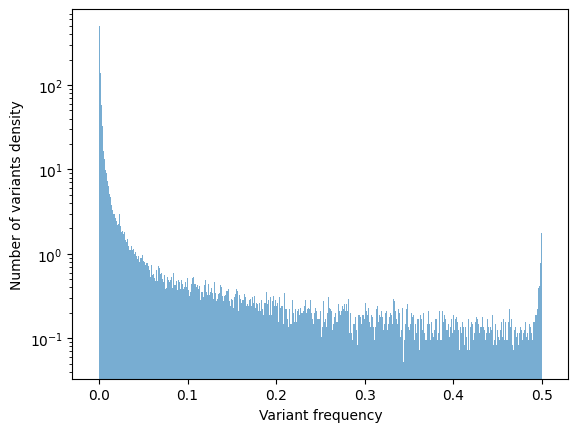

In [9]:
plt.xlim(-.03,.53)
# plt.ylim(10e-2, 10e3)
data = variants_df["mt_freq"]

# bins = (np.logspace(0, 1.041392685158225, 500, base=10) - 1) / 10
plt.hist(data, bins=500, log=True, density=True, alpha=.6)
plt.xlabel("Variant frequency")
plt.ylabel("Number of variants density")
plt.show()
# (np.logspace(0, 1.041392685158225, 100, base=10000) - 1) / 10000


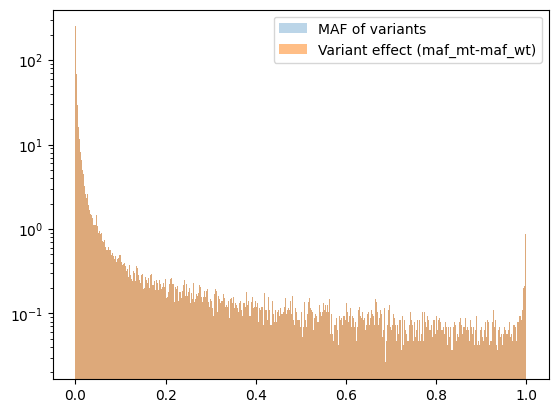

In [6]:
# compare (maf_mt-maf_wt) vs maf_mt distributions: these two are exactly same
mut_effect_true = variants_df["mt_freq"] - variants_df["wt_freq"] # ground truth mutation effect based on minor allele frequency
mut_effect_true_normalized = (mut_effect_true - mut_effect_true.min()) / (mut_effect_true.max() - mut_effect_true.min())
mut_freq_normalized = (variants_df["mt_freq"]-variants_df["mt_freq"].min())/(variants_df["mt_freq"].max()-variants_df["mt_freq"].min())

plt.hist(mut_effect_true_normalized, bins=500, density=True, log=True, alpha=.3, label="MAF of variants")
plt.hist(mut_freq_normalized, bins=500, density=True, log=True, alpha=.5, label="Variant effect (maf_mt-maf_wt)")
plt.legend()
plt.show()


Common: 18295, rare:29468


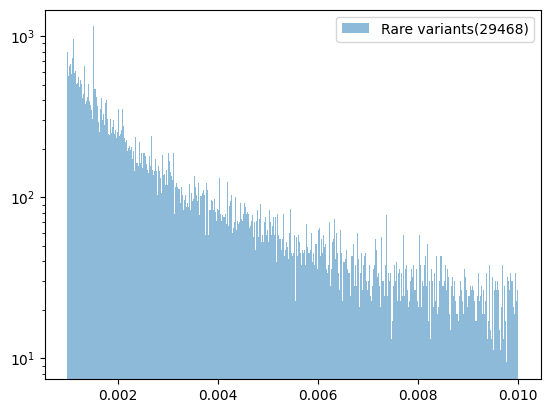

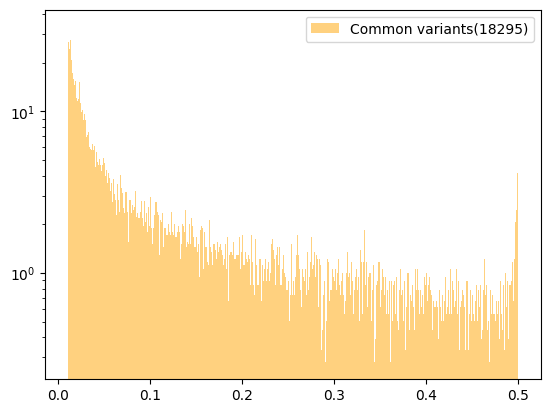

In [15]:
# comparing common and rare mt_freq distribution
common = variants_df[variants_df["mt_freq"]>=.01]
rare = variants_df[(variants_df["mt_freq"]<.01) & (variants_df["mt_freq"]>=.001)]
print(f"Common: {common.shape[0]}, rare:{rare.shape[0]}")

plt.hist(rare["mt_freq"], bins=500, density=True, log=True, alpha=.5, label=f"Rare variants({rare.shape[0]})")
plt.legend()
plt.show()

plt.hist(common["mt_freq"], bins=500, density=True, log=True, alpha=.5, color="orange", label=f"Common variants({common.shape[0]})")
plt.legend()
plt.show()

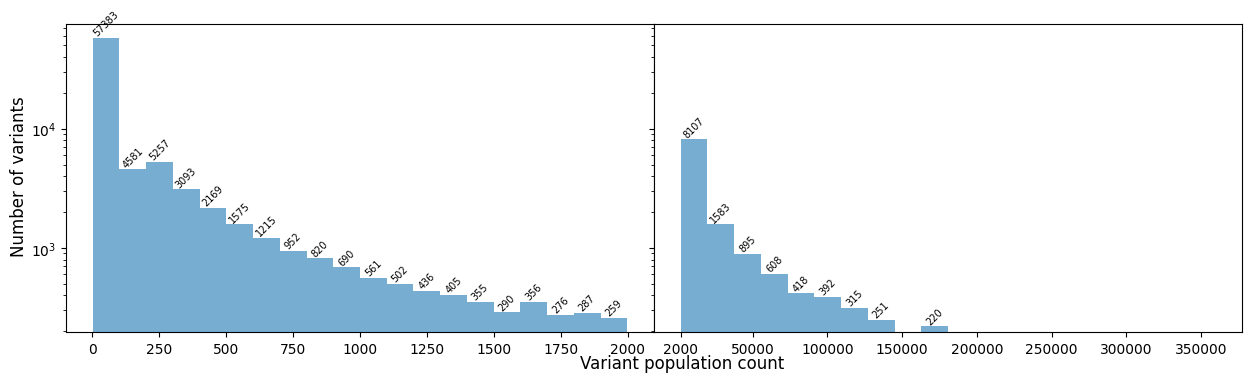

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4), sharex=False, sharey=True)
plt.subplots_adjust(hspace=0, wspace=0)
fig.supxlabel("Variant population count")    
fig.supylabel("Number of variants")
plt.subplots_adjust(left=0.06)
data = variants_df[variants_df["mut_poulation"] < 2000]["mut_poulation"]
counts, bins, patches = axs[0].hist(data, bins=20, log=True, alpha=.6,)
axs[0].bar_label(patches, fontsize=7, rotation=45)

data = variants_df[variants_df["mut_poulation"] >= 2000]["mut_poulation"]
counts, bins, patches = axs[1].hist(data, bins=20, log=True, alpha=.6)
# print(counts, bins)
axs[1].bar_label(patches, fontsize=7, rotation=45)

xticks = list(range(0, 400000, 50000)) # setting the 1st xtick 
xticks[0] = 2000
axs[1].set_xticks(xticks)
plt.show()

[57383.  4581.  5257.  3093.  2169.  1575.  1215.   952.   820.   690.
   561.   502.   436.   405.   355.   290.   356.   276.   287.   259.] [1.0000e+00 1.0090e+02 2.0080e+02 3.0070e+02 4.0060e+02 5.0050e+02
 6.0040e+02 7.0030e+02 8.0020e+02 9.0010e+02 1.0000e+03 1.0999e+03
 1.1998e+03 1.2997e+03 1.3996e+03 1.4995e+03 1.5994e+03 1.6993e+03
 1.7992e+03 1.8991e+03 1.9990e+03]
[8107. 1583.  895.  608.  418.  392.  315.  251.  181.  220.  154.  162.
  143.   96.   91.   98.   68.   35.   36.    9.] [  2001.   19872.5  37744.   55615.5  73487.   91358.5 109230.  127101.5
 144973.  162844.5 180716.  198587.5 216459.  234330.5 252202.  270073.5
 287945.  305816.5 323688.  341559.5 359431. ]


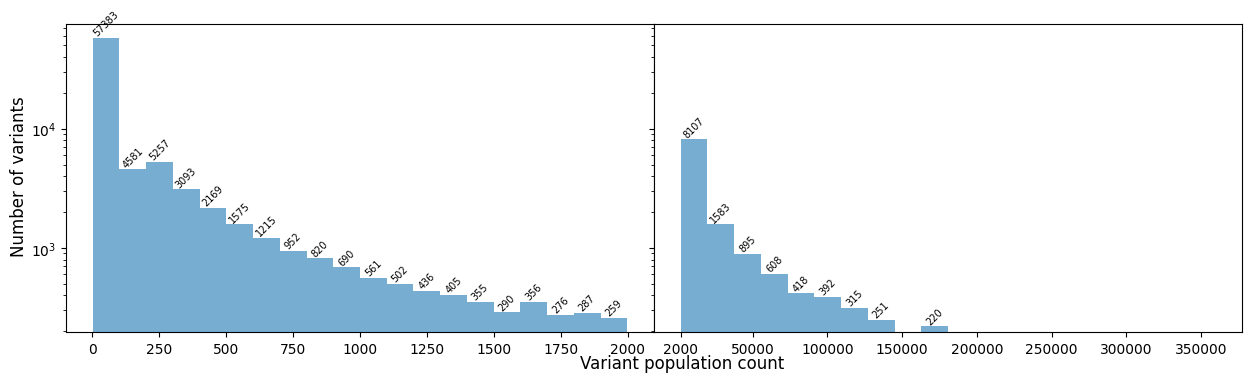

In [7]:
fig = plt.figure(figsize=(14, 4))
gs = fig.add_gridspec(1, 2, hspace=0, wspace=0)
(ax1, ax2) = gs.subplots(sharey='row')#sharey='row', sharex="col")

data = variants_df[variants_df["mut_poulation"] < 2000]["mut_poulation"]
counts, bins, patches = ax1.hist(data, bins=20, log=True, alpha=.6,)
ax1.bar_label(patches, fontsize=7, rotation=45)
print(counts, bins)

data = variants_df[variants_df["mut_poulation"] >= 2000]["mut_poulation"]
counts, bins, patches = ax2.hist(data, bins=20, log=False, alpha=.6)
print(counts, bins)
ax2.bar_label(patches, fontsize=7, rotation=45)

xticks = list(range(0, 400000, 50000)) # setting the 1st xtick 
xticks[0] = 2000
ax2.set_xticks(xticks)


for ax in fig.get_axes():
    ax.label_outer()
    
fig.supxlabel("Variant population count")    
fig.supylabel("Number of variants")
plt.subplots_adjust(left=0.06)
plt.show()    